# Clustering

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
import seaborn as sns; sns.set()  
from matplotlib.patches import Ellipse
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

## Cheese 🧀

In [34]:
df_fromage = pd.read_table("data/fromage.txt", index_col=0)
df_fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [35]:
df_fromage.index

Index(['CarredelEst', 'Babybel', 'Beaufort', 'Bleu', 'Camembert', 'Cantal',
       'Chabichou', 'Chaource', 'Cheddar', 'Comte', 'Coulomniers', 'Edam',
       'Emmental', 'Fr.chevrepatemolle', 'Fr.fondu.45', 'Fr.frais20nat.',
       'Fr.frais40nat.', 'Maroilles', 'Morbier', 'Parmesan', 'Petitsuisse40',
       'PontlEveque', 'Pyrenees', 'Reblochon', 'Rocquefort', 'SaintPaulin',
       'Tome', 'Vacherin', 'Yaourtlaitent.nat.'],
      dtype='object', name='Fromages')

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})

df_corr = df_fromage.corr()

ax = sns.heatmap(df_corr, xticklabels = df_fromage.columns, 
                 yticklabels = df_fromage.columns, annot=True, cmap = 'coolwarm')

### K-Means

In [37]:
X = df_fromage[['calories','folates']]
X.head()

,calories,folates
Fromages,,
CarredelEst,314,30.3
Babybel,314,6.4
Beaufort,401,1.2
Bleu,342,27.5
Camembert,264,36.4


<Axes: xlabel='calories', ylabel='folates'>

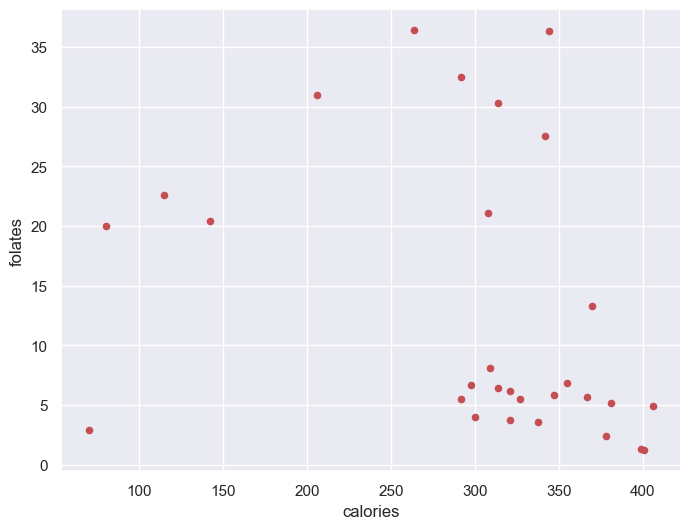

In [38]:
X.plot(kind="scatter", x='calories', y="folates", c='r')

In [39]:
X.shape

(29, 2)

#### Without centering and reducing

In [ ]:
kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(X)
print(kmean.labels_)
print(kmean.cluster_centers_)

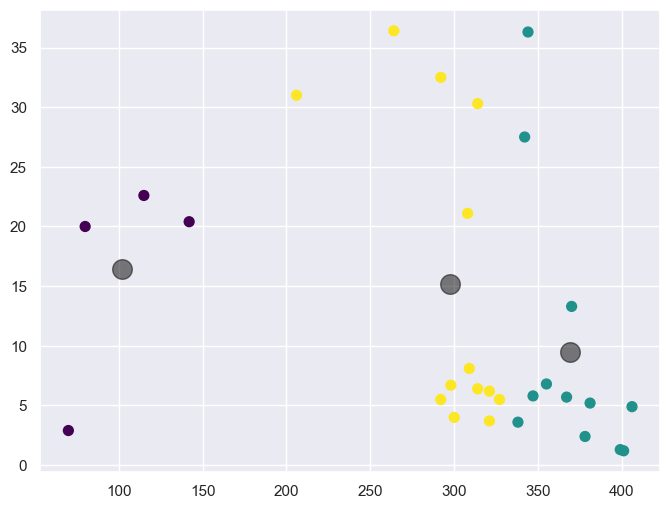

In [43]:
plt.scatter(X['calories'], X['folates'], c=kmean.labels_, s=50, cmap='viridis')
centers = kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [44]:
clusters = kmean.labels_
df_fromage['kmeans_1'] = clusters
df_fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,kmeans_1
Fromages,,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20,2
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27,2
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41,1
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27,1
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20,2


#### With centered and reduced data a

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XCR = scaler.fit_transform(X)
result = KMeans(n_clusters=3, random_state=0)
result.fit(XCR)

In [46]:
result.cluster_centers_

array([[-2.19545917,  0.30076596],
       [ 0.50648208, -0.66499286],
       [-0.04783438,  1.53811538]])

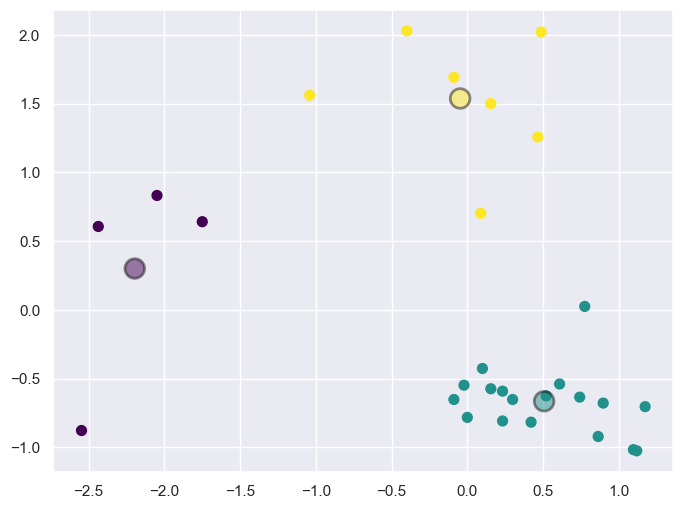

In [47]:
plt.figure()
plt.scatter(XCR[:,0], XCR[:,1], c=result.labels_, s=50, cmap='viridis')
centers = result.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c=np.unique(result.labels_),lw=2, edgecolors ="k",cmap='viridis',s=200, alpha=0.5);


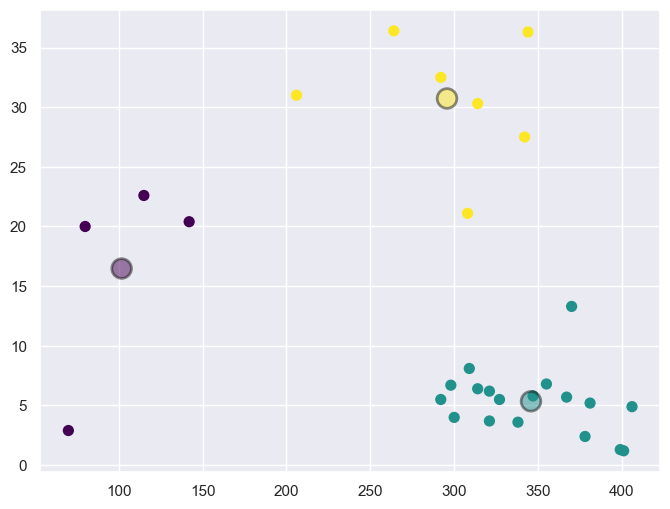

In [48]:
clusters = result.labels_

plt.scatter(X['calories'], X['folates'], c=result.labels_, s=50, cmap='viridis')
centers = scaler.inverse_transform(result.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c=np.unique(result.labels_),lw=2, edgecolors ="k",cmap='viridis',s=200, alpha=0.5)

In [49]:
df_fromage['kmeans_1CR'] = result.labels_
df_fromage

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,kmeans_1,kmeans_1CR
Fromages,,,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20,2,2
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27,2,1
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41,1,1
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27,1,2
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20,2,2
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30,1,1
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36,1,2
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25,2,2
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28,1,1


In [50]:
pd.crosstab(df_fromage.kmeans_1,df_fromage.kmeans_1CR, colnames=['KMeans'], 
            rownames=['KMeans_CR'], margins=True)

KMeans,0,1,2,All
KMeans_CR,,,,
0,4,0,0,4
1,0,10,2,12
2,0,8,5,13
All,4,18,7,29


#### Choice of number of K classes

In [ ]:
from matplotlib.patches import Ellipse
K = np.arange(2,10,1)
Sum_of_squared_distances = []
for k in K:
    km_char = KMeans(n_clusters=k)
    km_char = km_char.fit(XCR)
    Sum_of_squared_distances.append(km_char.inertia_)
    
print(Sum_of_squared_distances)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.xticks(np.arange(2, 10, step=1))
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

ax = plt.gca()

ellipse = Ellipse(xy=(3, 9), width=1, height=5, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

### Hierarchical Ascending Classification

In [51]:
X = df_fromage.iloc[:,0:9]
X.head(3)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41


In [52]:
scaler = StandardScaler()
fromage_CR = scaler.fit_transform(X)

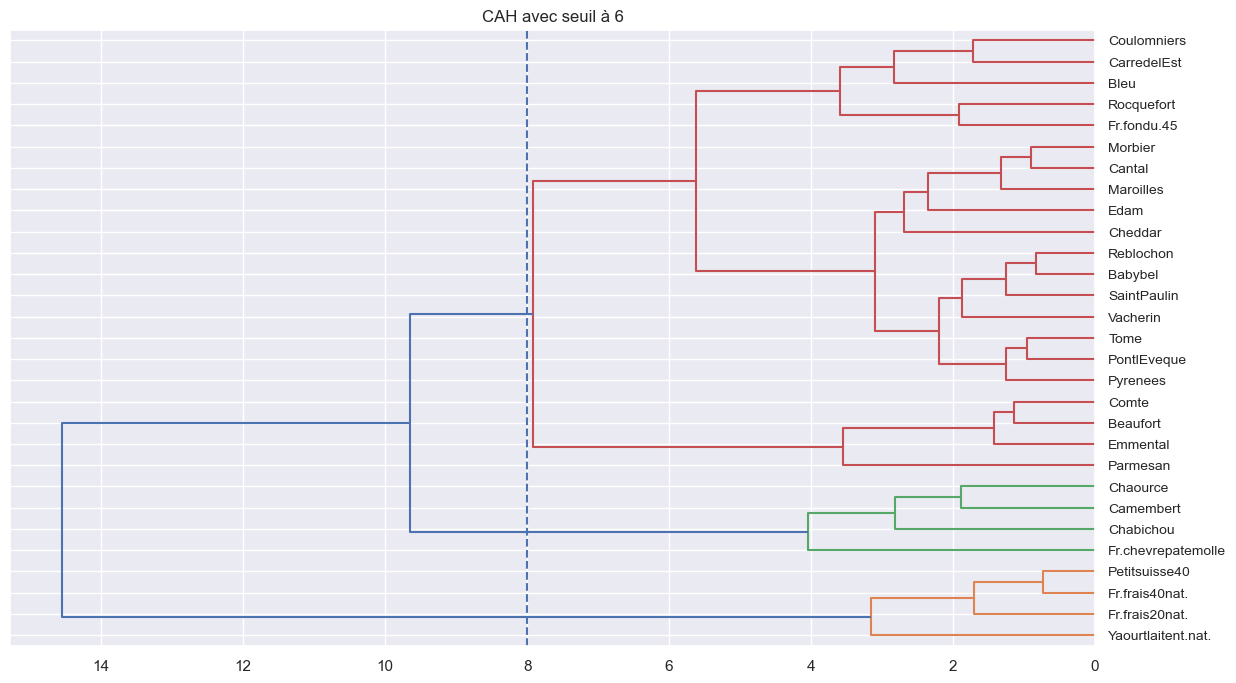

In [53]:
threshold = 8
Z = linkage(fromage_CR,method='ward',metric='euclidean')

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1)
plt.title('CAH avec seuil à 6')
dendrogram(Z,labels= X.index.tolist(),orientation='left',color_threshold=threshold)
plt.axvline(x=threshold,linestyle = '--')
plt.show()


In [54]:
from sklearn.metrics import silhouette_score
groupes_cah = fcluster(Z ,t=8,criterion='distance')
groupes_cah = groupes_cah-1
print(groupes_cah)
df_fromage['CAH'] = groupes_cah

silhouette_score(X,groupes_cah)

[2 2 2 2 1 2 1 1 2 2 2 2 2 1 2 0 0 2 2 2 0 2 2 2 2 2 2 2 0]


0.19126737001696448

In [55]:
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
agg.fit(X)
agg.labels_

array([0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 0, 2, 1], dtype=int64)

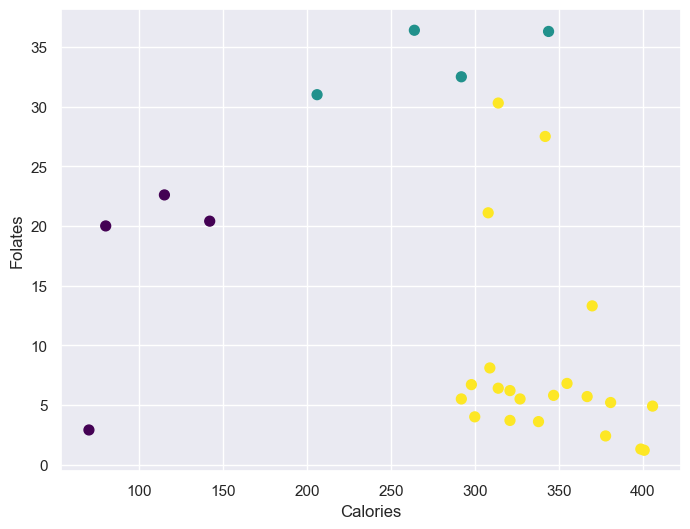

In [56]:
plt.figure()
plt.scatter(X['calories'], X['folates'], c=groupes_cah, s=50, cmap='viridis')
plt.xlabel("Calories")
plt.ylabel("Folates");

# Warning: plotting made only with 2 variables whereas clustreing made with 9

In [57]:
df_fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,kmeans_1,kmeans_1CR,CAH
Fromages,,,,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20,2,2,2
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27,2,1,2
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41,1,1,2
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27,1,2,2
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20,2,2,1


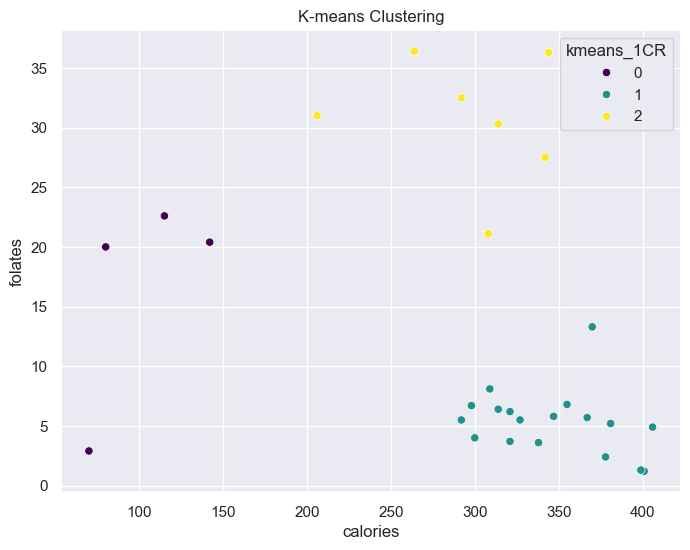

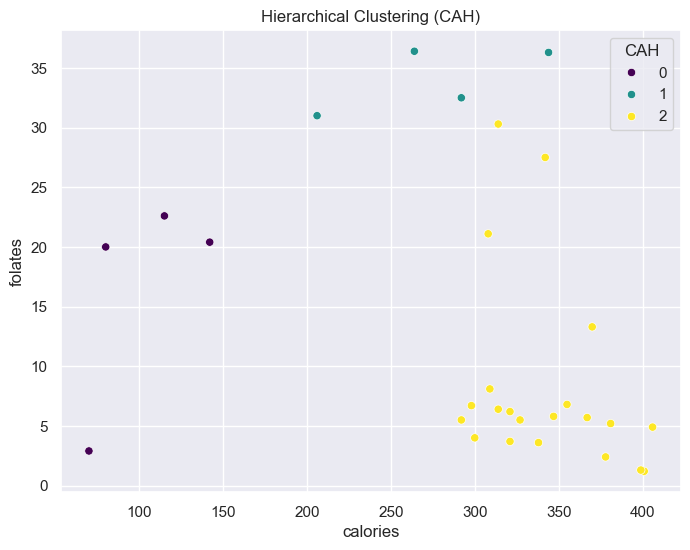

In [58]:
data_to_plot = df_fromage[['calories','folates','kmeans_1CR', 'CAH']]
sns.scatterplot(x='calories', y='folates', hue='kmeans_1CR', data=data_to_plot, palette='viridis', legend='full')
plt.title('K-means Clustering')
plt.show()

sns.scatterplot(x='calories', y='folates', hue='CAH', data=data_to_plot, palette='viridis', legend='full')
plt.title('Hierarchical Clustering (CAH)')
plt.show()
